In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, SimpleRNN
from keras import Sequential
from collections import deque
from keras.optimizers import Adam

## Create Dataset

In [2]:
t = np.arange(0, 1500)
x = np.sin(0.02 * t) + np.random.rand(1500) * 1.5

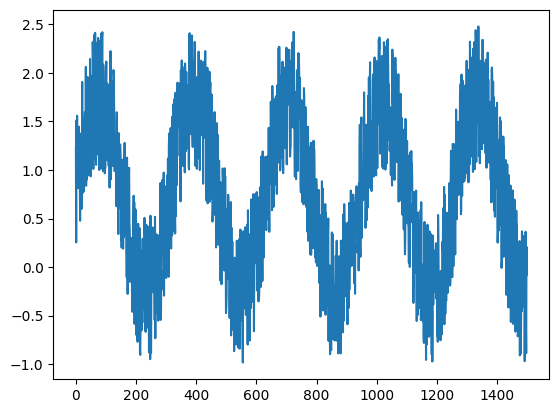

In [3]:
plt.plot(t, x)

### Train/Test Split

In [4]:
x_train = x[:1000]
x_test = x[1000:]
x.shape

(1500,)

- This function is for preparing time series data for training, where to predict the next value in the sequence given a fixed window of past values.

In [5]:
def convertToDataset(data, step):
    X, Y = [], []
    for i in range(len(data) - step):
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)


In [20]:
X_test, y_test = convertToDataset(x_test, 20)
X_train, y_train = convertToDataset(x_train, 10)

In [21]:
print(X_test.shape)
print(X_train.shape)

(480, 20)
(990, 10)


In [22]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [23]:
print(X_test.shape)
print(X_train.shape)

(480, 20, 1)
(990, 10, 1)


### Create Simple RNN Model With different Sequence Length

In [24]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(None, 1), activation='tanh')) #this None in input shape is for sequence len
model.add(Dense(1))

optimizer = Adam(learning_rate=7e-3)
model.compile(optimizer=optimizer, loss='mse')

In [25]:
model.fit(X_train, y_train, epochs=200, batch_size=64)

Epoch 1/200
16/16 [==============================] - 1s 4ms/step - loss: 0.4028
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2704
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2316
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2335
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2168
Epoch 6/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2135
Epoch 7/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2108
Epoch 8/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2154
Epoch 9/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2280
Epoch 10/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2213
Epoch 11/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2133
Epoch 12/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2112
Epoch 13/200
16/16 [=================

## Evaluate

In [28]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 4ms/step - loss: 0.3598


0.3598138988018036

In [29]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
pred = np.concatenate((train_pred, test_pred), axis=0)

15/15 [==============================] - 0s 3ms/step


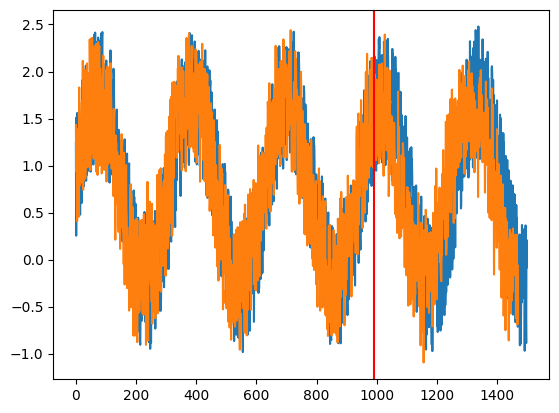

In [30]:
plt.plot(x)
plt.plot(pred)
plt.axvline(len(X_train), c="r")